### **Decision Tree (ID3 Implementation)**

Link: https://www.kaggle.com/code/smsmibrahim/decision-tree-id3-implementation-using-play-tennis/notebook

In [1]:
import numpy as np
import pandas as pd
eps = np.finfo(float).eps
from numpy import log2 as log

In [22]:
df=pd.read_csv('/content/play_tennis.csv')
df = df.drop('day',axis=1)

In [23]:
df.head(14)

,outlook,temp,humidity,wind,play
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


In [24]:
print(f'Rows: {df.shape[0]}, Columns: {df.shape[1]}')

Rows: 14, Columns: 5


In [25]:
print(df.columns)

Index(['outlook', 'temp', 'humidity', 'wind', 'play'], dtype='object')


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   outlook   14 non-null     object
 1   temp      14 non-null     object
 2   humidity  14 non-null     object
 3   wind      14 non-null     object
 4   play      14 non-null     object
dtypes: object(5)
memory usage: 688.0+ bytes


In [64]:
df.describe()

,outlook,temp,humidity,wind,play
count,14,14,14,14,14
unique,3,3,2,2,2
top,Sunny,Mild,High,Weak,Yes
freq,5,6,7,8,9


In [63]:
df.isnull()

,outlook,temp,humidity,wind,play
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
5,False,False,False,False,False
6,False,False,False,False,False
7,False,False,False,False,False
8,False,False,False,False,False
9,False,False,False,False,False


All values are FALSE for isnull().
Therefore no data cleaning is required.

In [29]:
# Entropy

def find_entropy(df):
    #target column
    target = df.keys()[-1]
    entropy = 0
    values = df[target].unique()
    #calc entropy
    for value in values:
        fraction = df[target].value_counts()[value]/len(df[target])
        entropy += -fraction*np.log2(fraction)
    return entropy

In [30]:
# Average Information

def average_information(df,attribute):
  target = df.keys()[-1]   #target column
  target_variables = df[target].unique()  #This gives all 'Yes' and 'No'
  variables = df[attribute].unique()    #This gives different features in that attribute (like 'Hot','Cold' in Temperature)
  entropy2 = 0
  for variable in variables:
      entropy = 0
      for target_variable in target_variables:
          num = len(df[attribute][df[attribute]==variable][df[target] ==target_variable])
          den = len(df[attribute][df[attribute]==variable])
          fraction = num/(den+eps)
          entropy += -fraction*log(fraction+eps)
      fraction2 = den/len(df)
      entropy2 += -fraction2*entropy
  return abs(entropy2)

In [31]:
# Information Gain

def find_winner(df):
    IG = []
    for key in df.keys()[:-1]:
        IG.append(find_entropy(df)-average_information(df,key))
    return df.keys()[:-1][np.argmax(IG)]

In [32]:
def get_subtable(df, node,value):
  return df[df[node] == value].reset_index(drop=True)

In [33]:
def buildTree(df,tree=None):
    target = df.keys()[-1]   #target column

    #Here we build our decision tree

    #Get attribute with maximum information gain
    node = find_winner(df)

    #Get distinct value of that attribute e.g Salary is node and Low,Med and High are values
    attValue = np.unique(df[node])

    #Create an empty dictionary to create tree
    if tree is None:
        tree={}
        tree[node] = {}

    #We make loop to construct a tree by calling this function recursively.
    #In this we check if the subset is pure and stops if it is pure.

    for value in attValue:

        subtable = get_subtable(df,node,value)
        clValue,counts = np.unique(subtable[target],return_counts=True)

        if len(counts)==1:#Checking purity of subset
            tree[node][value] = clValue[0]
        else:
            tree[node][value] = buildTree(subtable) #Calling the function recursively

    return tree

In [34]:
tree = buildTree(df)

In [35]:
import pprint
pprint.pprint(tree)

{'outlook': {'Overcast': 'Yes',
             'Rain': {'wind': {'Strong': 'No', 'Weak': 'Yes'}},
             'Sunny': {'humidity': {'High': 'No', 'Normal': 'Yes'}}}}


### **Decision Tree**

Link: https://www.datacamp.com/tutorial/decision-tree-classification-python?authuser=0

In [46]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [47]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
pima = pd.read_csv("diabetes.csv", header=None, names=col_names)

In [48]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0


In [49]:
pima = pima[1::1]

In [50]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1


In [51]:
pima.isnull()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False
767,False,False,False,False,False,False,False,False,False


In [52]:
#Splitting dataset in features and target variable
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols] # Features
y = pima.label # Target variable

In [54]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [55]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict response for test dataset
y_pred = clf.predict(X_test)

In [56]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6536796536796536


In [ ]:
pip install graphviz

In [ ]:
pip install pydotplus

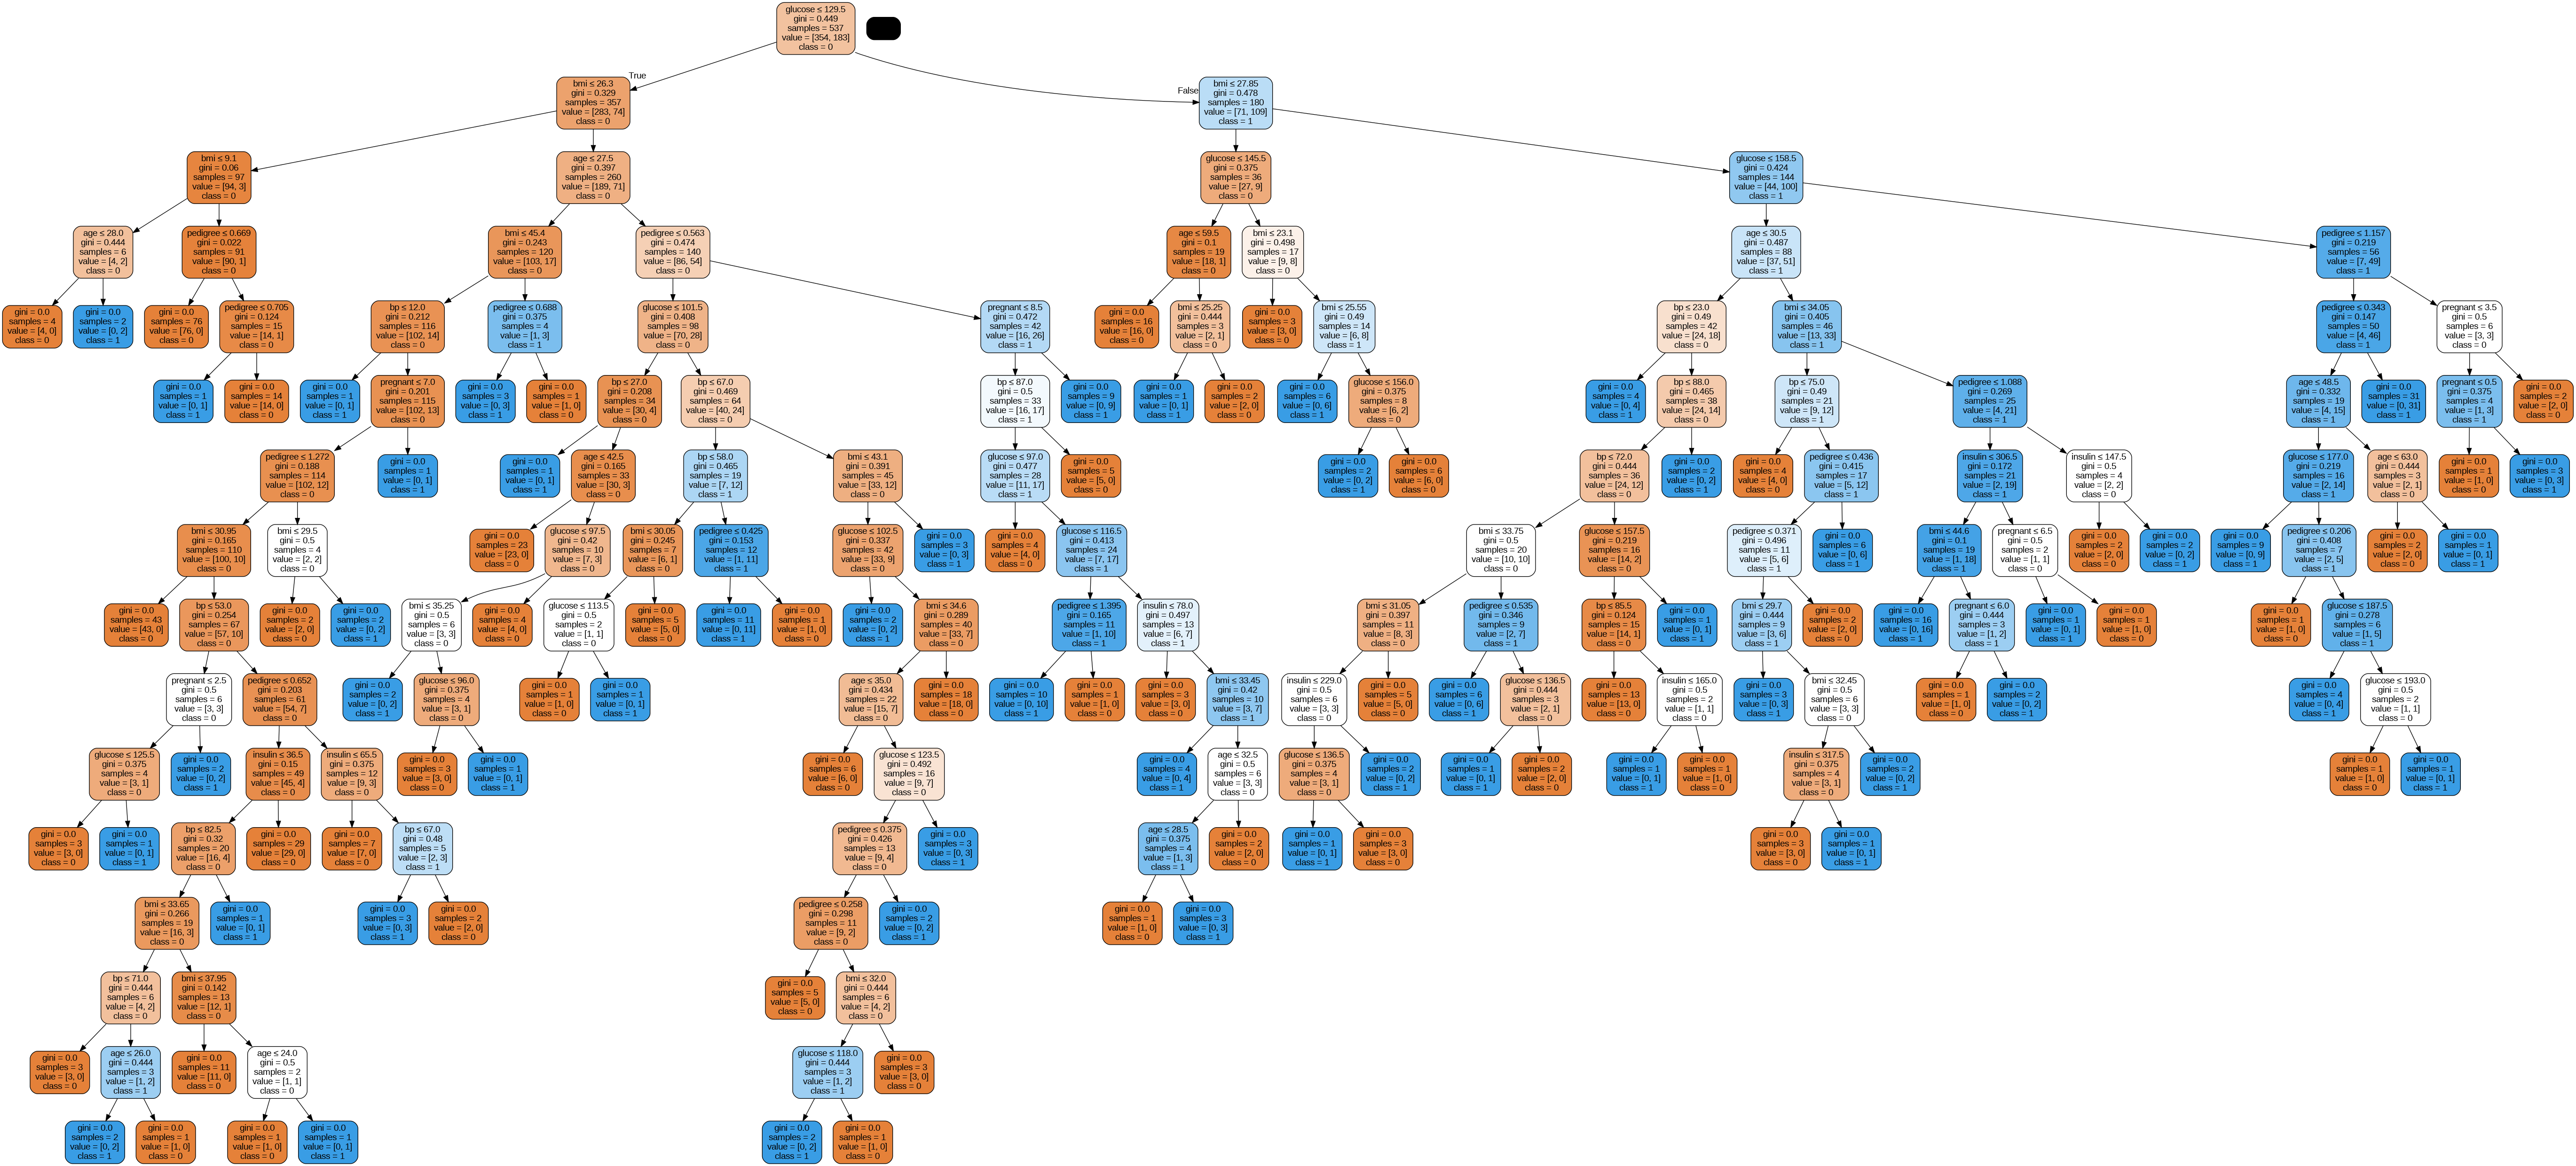

In [61]:
from sklearn.tree import export_graphviz
from io import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names=feature_cols, class_names=['0', '1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png())


In [62]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7705627705627706
